<a href="https://colab.research.google.com/github/ErickAlcaino/Proyectos/blob/main/Variedad%20De%20Grano/VariedadGranoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto.

Se tiene 210 observaciones de 3 Variedades de Grano con 8 diferentes caracteristicas de estos. Se busca predecir la Variedad de un nuevo grano en funcion de estas Características.

# Enfoque

En este colab se emplean 2 modelos en específico, Árbol de Decisión y Vecinos Cercanos.

In [ ]:
# Manejo de datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import mutual_info_classif # Mutual information classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
def plot_cm(y_pred, y_test, LABELS,titulo ,grados = 0):
  "Función para graficar matriz de confusión"
  ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        cmap=plt.cm.Blues,
      display_labels = LABELS
  )
  plt.xticks(rotation=grados)
  plt.title('Confusion Matrix'+str(titulo))
  plt.show()

  def cla_report(y_test,y_pred):
    #Resume the function classification_report(...)
    return classification_report(y_test.tolist(), y_pred, target_names = ['Variedad 1', 'Variedad 2','Variedad 3'])

In [ ]:
data_seed=pd.read_csv('/content/drive/My Drive/Data/seeds_dataset.txt', delim_whitespace=True, header=None)
columnas = ['Area', 'Perimetro', 'Compacidad', 'Longitud grano', 'Anchura grano', 'Coeficiente asimetria', 'Longitud surco grano', 'Variedad']
data_seed.columns = columnas
display(data_seed)

print("\n Número de filas duplicadas:", data_seed.duplicated().sum())

scaler = MinMaxScaler()

# Normalizar los datos
data_normalizado = pd.DataFrame(scaler.fit_transform(data_seed), columns=data_seed.columns)


,Area,Perimetro,Compacidad,Longitud grano,Anchura grano,Coeficiente asimetria,Longitud surco grano,Variedad
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3



 Número de filas duplicadas: 0


**Notamos que hay 210 observaciones de diferentes granos, donde hay 3 variedades y cada variedad posee 7 caracteristicas**

In [ ]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100
    return temp_ps
info=datainfo(data_seed)
info

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Area,float64,210,193,0,0.0
Perimetro,float64,210,170,0,0.0
Compacidad,float64,210,186,0,0.0
Longitud grano,float64,210,188,0,0.0
Anchura grano,float64,210,184,0,0.0
Coeficiente asimetria,float64,210,207,0,0.0
Longitud surco grano,float64,210,148,0,0.0
Variedad,int64,210,3,0,0.0


**No tenemos datos faltantes**

<ipython-input-19-714361e454ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Variedad', kind='count',data=data_seed,palette='Set2')


,count
Variedad,
1,70
2,70
3,70


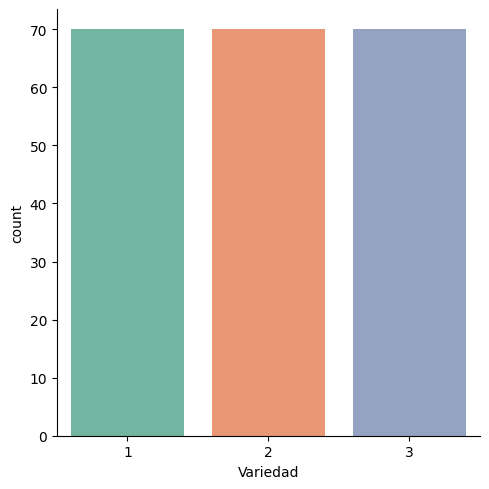

In [ ]:
sns.catplot(x='Variedad', kind='count',data=data_seed,palette='Set2')
data_seed['Variedad'].value_counts()

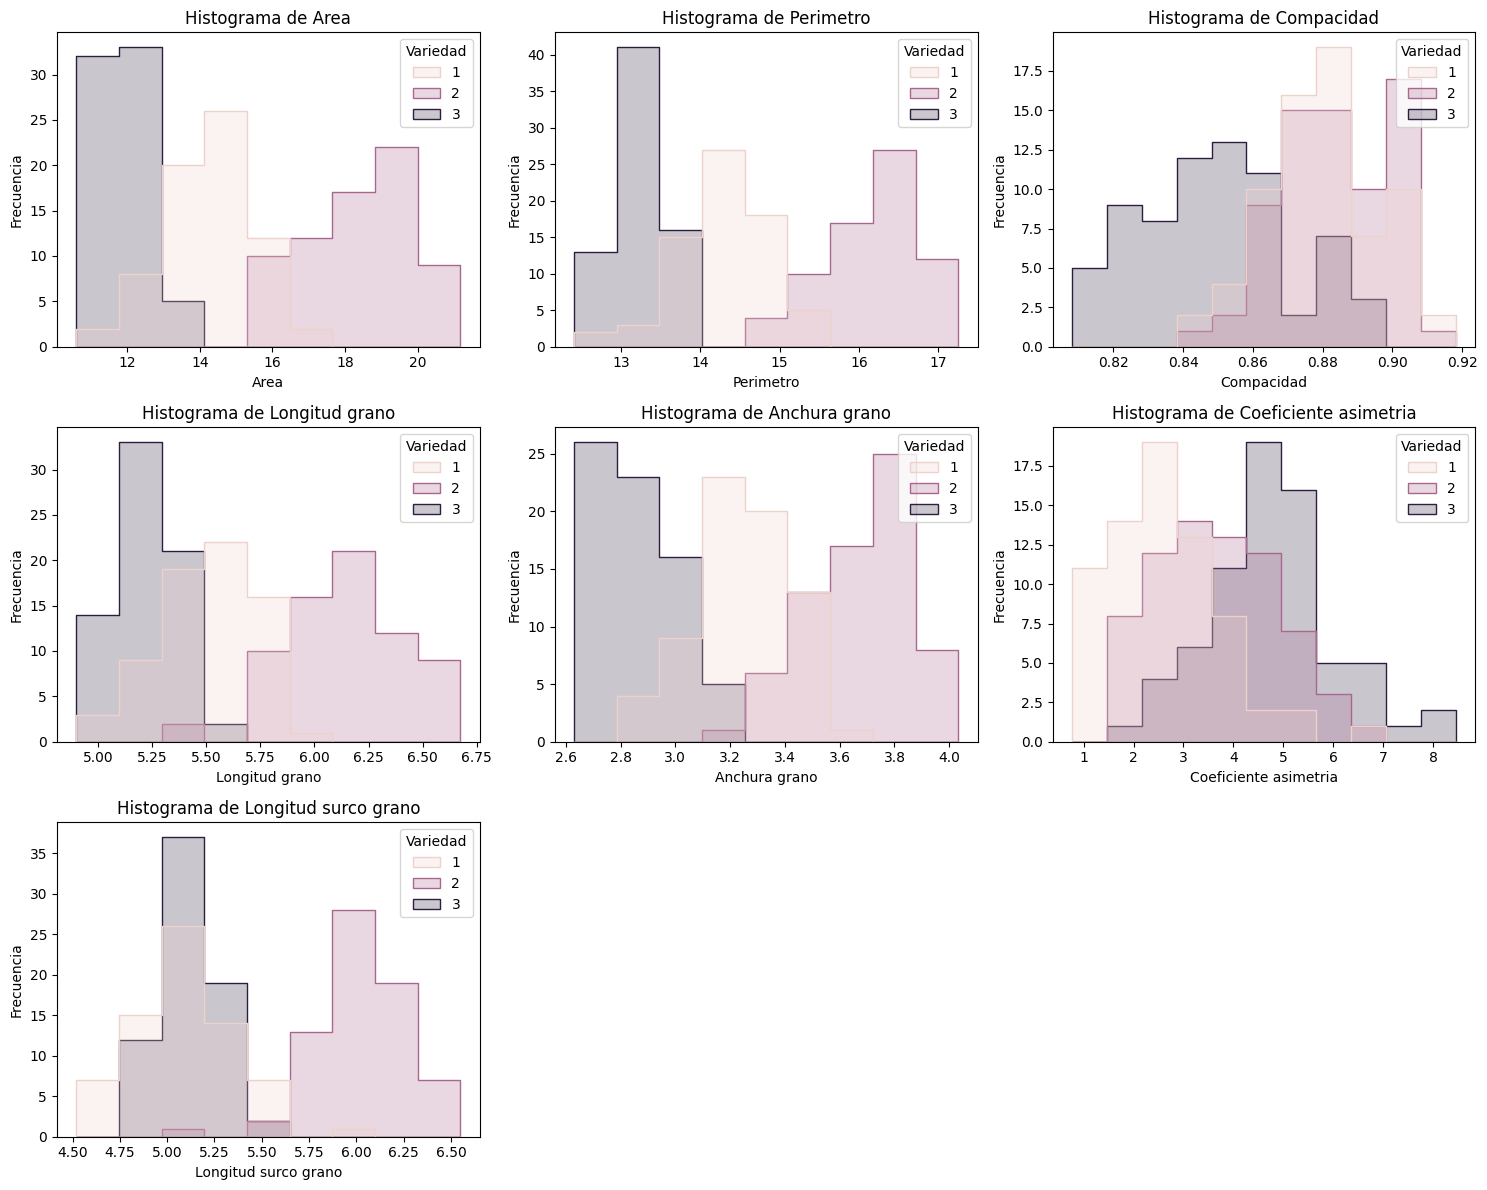

In [ ]:
covariables = data_seed.columns[:-1]
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12))
axes = axes.flatten()

# Iterar sobre cada columna y crear el histograma correspondiente
for index, col in enumerate(covariables):
    sns.histplot(data=data_seed, x=col, hue='Variedad', element='step', ax=axes[index])
    axes[index].set_title(f'Histograma de {col}')
    axes[index].set_xlabel(col)
    axes[index].set_ylabel('Frecuencia')

# Ocultar cualquier subplot vacío
for i in range(index + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
for variedad in data_seed['Variedad'].unique():
  print('------ Variedad: ',variedad,'--------------')
  df = data_seed[data_seed['Variedad'] == variedad].describe()
  df = df.iloc[:, :-1] #Que no muestre la columna variedad
  df.loc['skew'] = data_seed[data_seed['Variedad'] == variedad].skew()
  df.loc['kurt'] = data_seed[data_seed['Variedad'] == variedad].kurt()
  display(df)
  print('\n')

------ Variedad:  1 --------------


,Area,Perimetro,Compacidad,Longitud grano,Anchura grano,Coeficiente asimetria,Longitud surco grano
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000
skew,-0.235604,-0.429254,0.017744,-0.347375,-0.087053,0.869218,0.145252
kurt,0.068170,0.305775,-0.097900,-0.090867,-0.347731,1.129632,0.196671




------ Variedad:  2 --------------


,Area,Perimetro,Compacidad,Longitud grano,Anchura grano,Coeficiente asimetria,Longitud surco grano
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000
skew,-0.361878,-0.371606,-0.189420,-0.253715,-0.342596,0.307972,-0.346605
kurt,-0.439794,-0.363521,-0.689244,0.262758,-0.446904,-0.475708,1.119620




------ Variedad:  3 --------------


,Area,Perimetro,Compacidad,Longitud grano,Anchura grano,Coeficiente asimetria,Longitud surco grano
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000
skew,0.234471,-0.004723,0.129002,0.051193,0.516889,0.309451,0.005157
kurt,-0.871167,-0.473650,-0.436404,-0.478457,-0.536231,0.665779,-0.394614


Notamos una

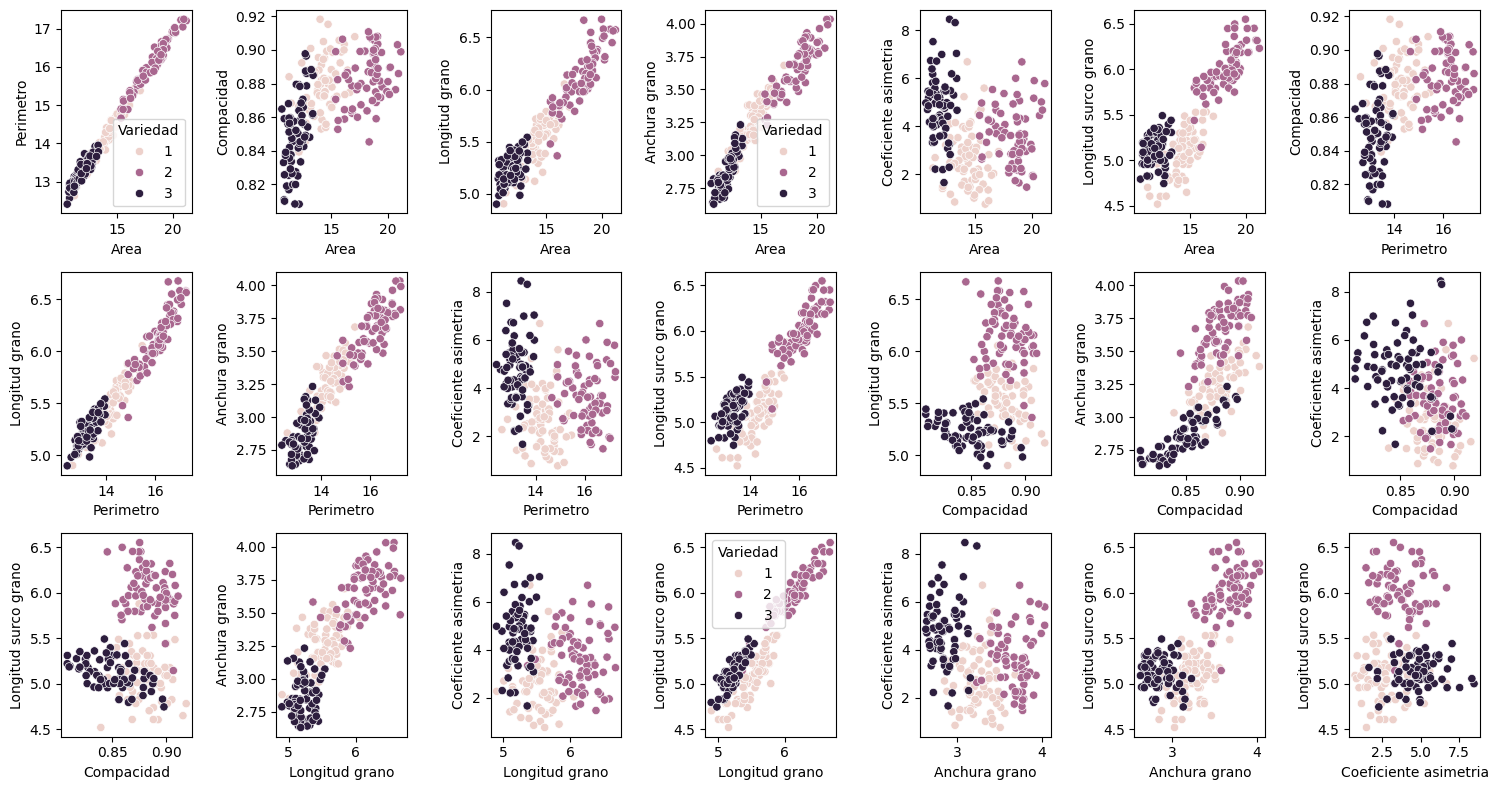

In [ ]:

covariables = data_seed.columns[:-1]
nrows, ncols = 3, 7
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))
axes = axes.flatten()

# Genera los Plots por cada covariable
index = 0
for i in range(len(covariables)):
    for j in range(i + 1, len(covariables)):
        sns.scatterplot(x=covariables[i], y=covariables[j], hue='Variedad', data=data_seed, ax=axes[index], legend=False if index not in [0,3,17] else 'brief')
        # titulos y labels
        axes[index].set_title('')
        axes[index].set_xlabel(covariables[i])
        axes[index].set_ylabel(covariables[j])
        index += 1

# Esconde miniGraficos no usados
for i in range(index, nrows * ncols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


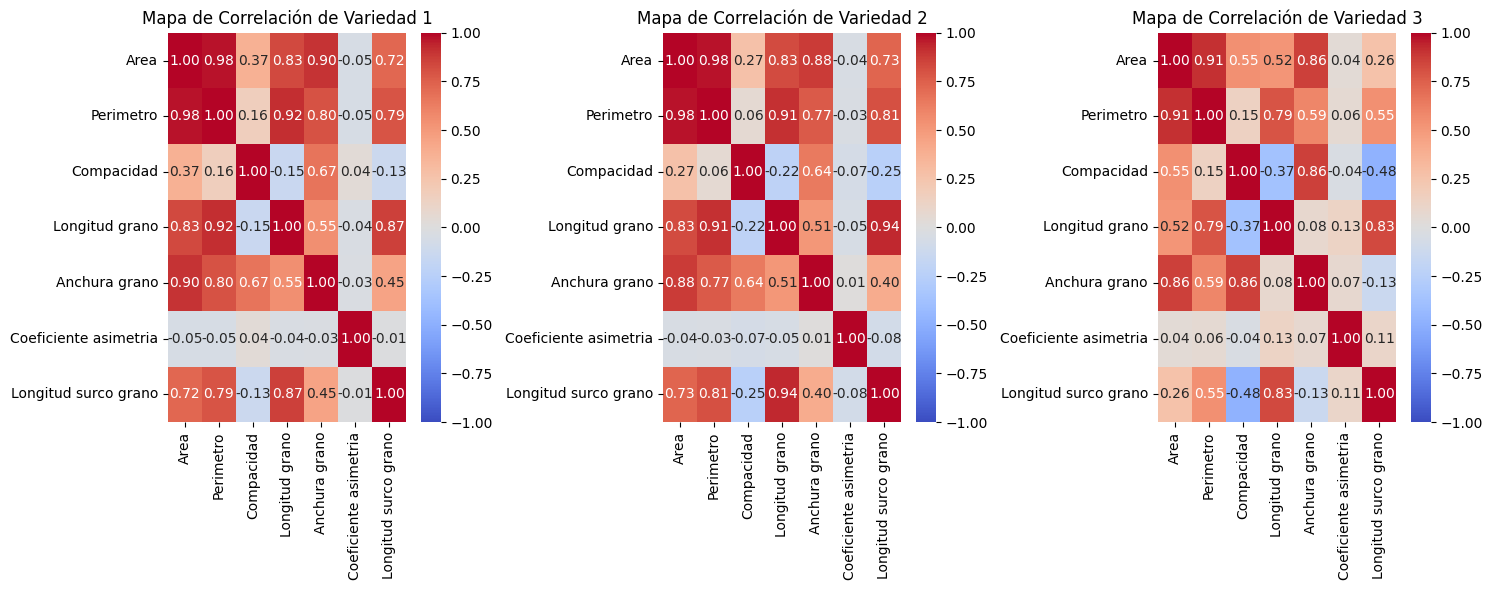

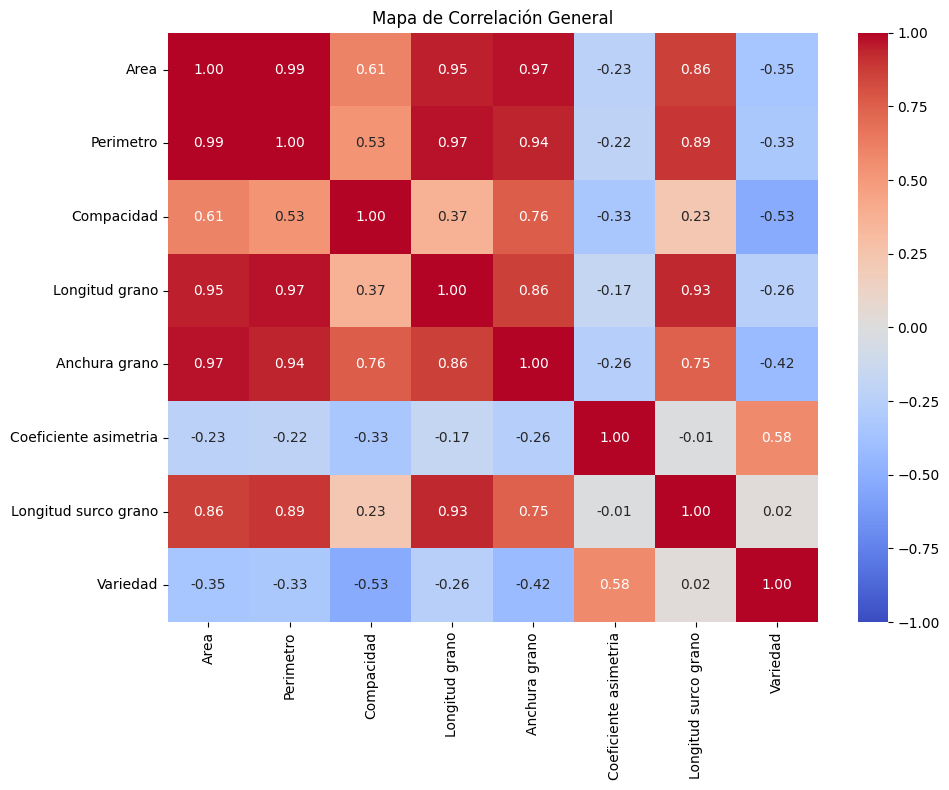

In [ ]:
variedades = data_seed['Variedad'].unique()
nrows,ncols = 1,3
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 6))

# Iterar sobre las primeras tres variedades y generar los heatmaps
for index, variedad in enumerate(variedades[:3]):  # Solo las primeras tres variedades
    correlation_matrix = data_seed[data_seed['Variedad'] == variedad].drop('Variedad', axis=1).corr()
    # Crear el heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", ax=axes[index])
    axes[index].set_title(f'Mapa de Correlación de Variedad {variedad}')

# Ajustar el layout antes de agregar el cuarto gráfico
plt.tight_layout()

# Crear un nuevo gráfico para el heatmap general
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico general
correlation_matrix = data_seed.corr()

# Crear el heatmap general
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlación General')
plt.tight_layout()
plt.show()  # Mostrar todos los gráficos

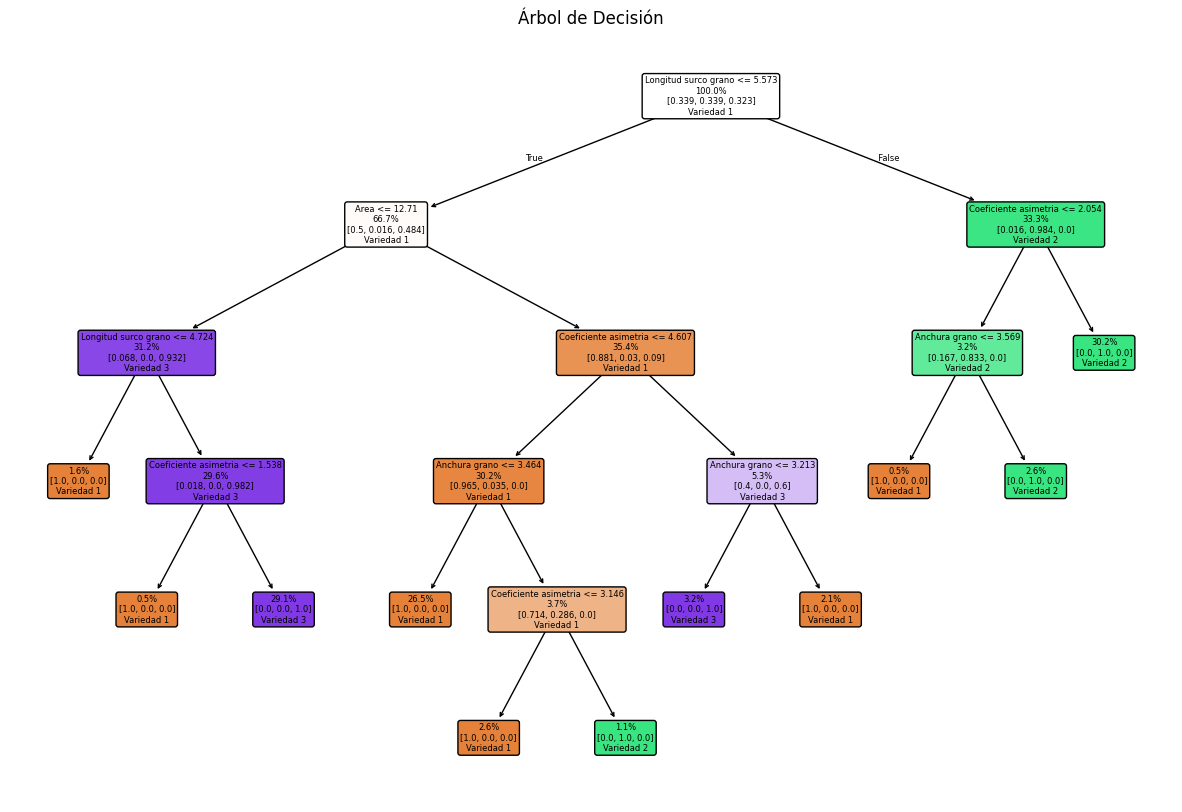

Classification Report DT:
              precision    recall  f1-score   support

  Variedad 1       0.75      1.00      0.86         6
  Variedad 2       1.00      1.00      1.00         6
  Variedad 3       1.00      0.78      0.88         9

    accuracy                           0.90        21
   macro avg       0.92      0.93      0.91        21
weighted avg       0.93      0.90      0.91        21

Accuracy DecisionTree: 0.9047619047619048


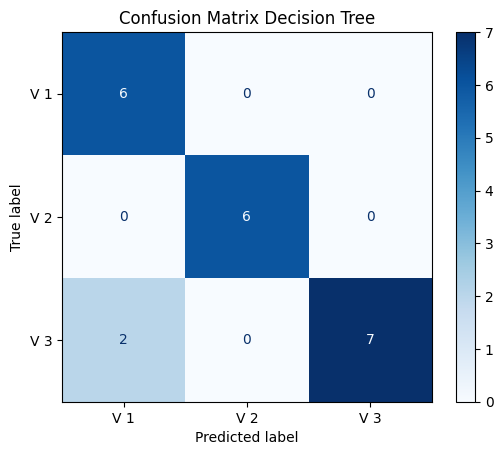

In [ ]:
X = data_seed.drop(['Variedad','Compacidad'], axis=1)
y = data_seed['Variedad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Crear y entrenar el modelo
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

class_names = [f'Variedad {i+1}' for i in range(len(dt.classes_))]
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, fontsize=6, impurity=False, proportion=True, label='none')
plt.title("Árbol de Decisión")
plt.show()

# Predecir las variedades de las semillas en el conjunto de prueba
y_dt_pred = dt.predict(X_test)

print("Classification Report DT:")
print(classification_report(y_test, y_dt_pred, target_names = ['Variedad 1', 'Variedad 2','Variedad 3']))


# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_dt_pred)
print("Accuracy DecisionTree:", accuracy)

plot_cm(y_dt_pred, y_test,['V 1', 'V 2', 'V 3'],' Decision Tree')


Classification Report KNN:
              precision    recall  f1-score   support

  Variedad 1       0.83      0.83      0.83         6
  Variedad 2       1.00      1.00      1.00         6
  Variedad 3       0.89      0.89      0.89         9

    accuracy                           0.90        21
   macro avg       0.91      0.91      0.91        21
weighted avg       0.90      0.90      0.90        21

Accuracy Vecinos Cercanos: 0.9047619047619048


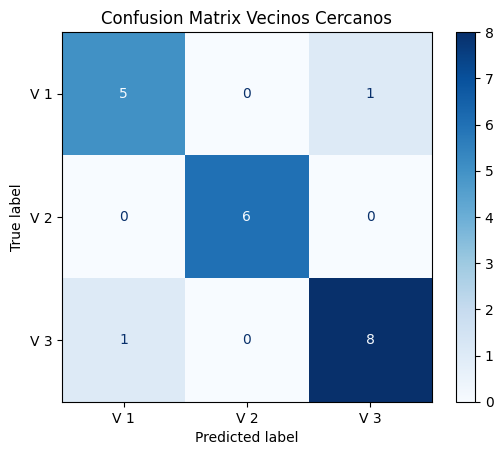

In [ ]:
X = data_normalizado.drop(['Variedad','Compacidad'], axis=1)
y = data_seed['Variedad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Crear y entrenar el modelo
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


# Predecir las variedades de las semillas en el conjunto de prueba
y_knn_pred = knn.predict(X_test)

print("Classification Report KNN:")
print(classification_report(y_test, y_knn_pred, target_names = ['Variedad 1', 'Variedad 2','Variedad 3']))


# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_knn_pred)
print("Accuracy Vecinos Cercanos:", accuracy)

plot_cm(y_knn_pred, y_test,['V 1', 'V 2', 'V 3'],' Vecinos Cercanos')

In [ ]:

X = data_seed.drop(['Variedad','Compacidad'], axis=1)
X_norm = data_normalizado.drop('Variedad', axis=1)
y = data_seed['Variedad']

display(X_norm)

# Creamos los modelos
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

# Validación cruzada estratificada con 10 folds
cv = StratifiedKFold(n_splits=70, shuffle=True, random_state=42)

# Calculamos los scores de cross-validation
dt_scores = 1-cross_val_score(dt, X, y, cv=cv)

print("Tasa Error global Decision Tree:", dt_scores.mean())

# Calculamos los scores de cross-validation
knn_scores = 1-cross_val_score(knn, X_norm, y, cv=cv)

# Imprimimos los resultados
print("Tasa Error global KNN:", knn_scores.mean())

,Area,Perimetro,Compacidad,Longitud grano,Anchura grano,Coeficiente asimetria,Longitud surco grano
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493


Tasa Error global Decision Tree: 0.0761904761904762
Tasa Error global KNN: 0.07142857142857142


<ipython-input-27-30edf698a0bf>:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


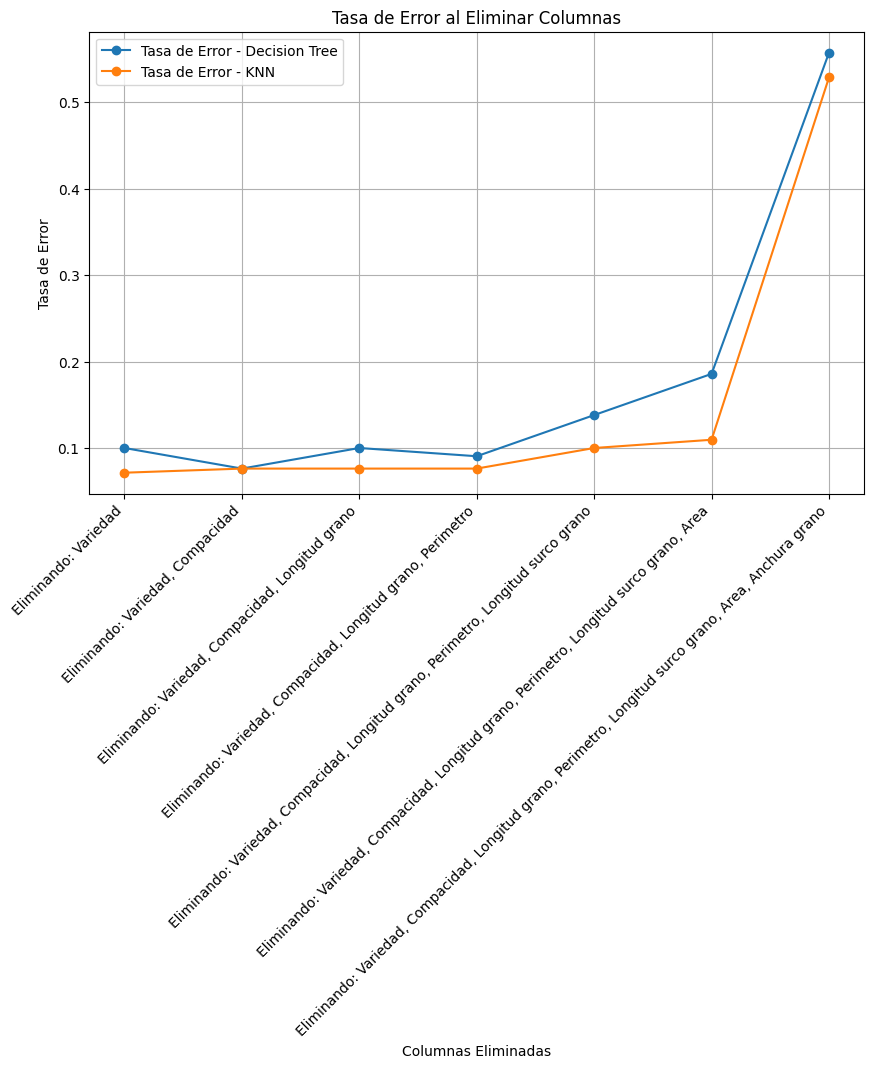

In [ ]:
columnas_a_quitar = ['Variedad','Compacidad', 'Longitud grano', 'Perimetro','Longitud surco grano', 'Area','Anchura grano']
errores_dt = []
errores_knn = []

# Creamos los modelos
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

# Número de splits para validación cruzada
cv = StratifiedKFold(n_splits=70, shuffle=True, random_state=42)

# Iterar sobre las columnas a quitar
for i in range(len(columnas_a_quitar)):
    # Quitar las columnas hasta el índice 'i'
    X_reducido = data_seed.drop(columnas_a_quitar[:i+1], axis=1)
    X_norm_reducido = data_normalizado.drop(columnas_a_quitar[:i+1], axis=1)
    y = data_seed['Variedad']

    # Cross-validation para el Decision Tree
    dt_scores = 1 - cross_val_score(dt, X_reducido, y, cv=cv)
    errores_dt.append(dt_scores.mean())

    # Cross-validation para KNN
    knn_scores = 1 - cross_val_score(knn, X_norm_reducido, y, cv=cv)
    errores_knn.append(knn_scores.mean())

# Crear las etiquetas para los puntos en el gráfico
etiquetas = [f'Eliminando: {", ".join(columnas_a_quitar[:i+1])}' for i in range(len(columnas_a_quitar))]

# Graficar las tasas de error
plt.figure(figsize=(10, 6))
plt.plot(range(len(errores_dt)), errores_dt, label='Tasa de Error - Decision Tree', marker='o')
plt.plot(range(len(errores_knn)), errores_knn, label='Tasa de Error - KNN', marker='o')

plt.xticks(range(len(etiquetas)), etiquetas, rotation=45, ha='right')
plt.title('Tasa de Error al Eliminar Columnas')
plt.xlabel('Columnas Eliminadas')
plt.ylabel('Tasa de Error')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()